In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv
from scipy.misc import electrocardiogram
import numpy as np
import scipy.signal
from scipy.fft import fft, fftfreq
import matplotlib.pyplot as plt
import plotly
import plotly.graph_objs as go
from IPython.display import Audio as audioPlayer

In [29]:
#functions for plotting in time and freq domain
def plotFourierMag(song_mag_data):
    time = np.arange(0, len(song)) / sr
    fig, ax = plt.subplots()
    ax.plot(song_frequency, song_mag_data)
    ax.set(xlabel='Time(s)', ylabel='sound amplitude')
    plt.show()


def plotInTime():
    time = np.arange(0, len(song)) / sr
    fig, ax = plt.subplots()
    ax.plot(time, song)
    ax.set(xlabel='Time(s)', ylabel='sound amplitude')
    plt.show()


def plotWhatever(y):
    x_axis = np.arange(0, y.size)
    fig, ax = plt.subplots()
    ax.plot(x_axis, y)
    ax.set(xlabel='X', ylabel='Y')
    plt.show()

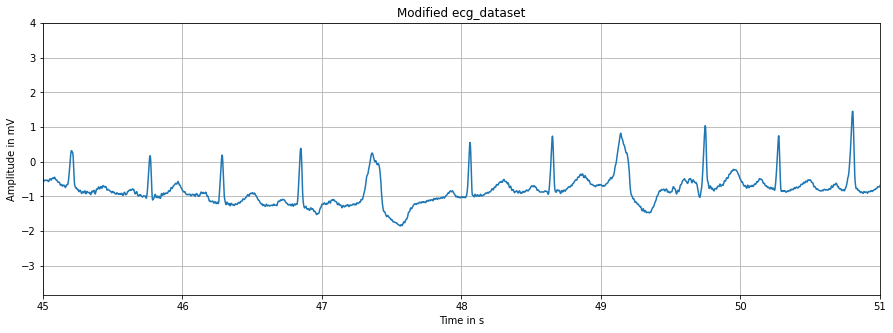

In [30]:
song = electrocardiogram()  # Calling the arrhythmia database of a woman
sampling_frequency = 360  # determining f sample
time = np.arange(song.size) / sampling_frequency  # detrmining time axis
sr =360
fig = plt.figure(figsize=[15, 5])
plt.plot(time, song)
plt.xlim(45, 51)
plt.title("Modified ecg_dataset")
plt.xlabel("Time in s")
plt.ylabel("Amplitude in mV")
plt.grid()

In [31]:
def fourier_function(song):
    complex_fft = scipy.fft.rfft(song)
    magnitude = np.abs(complex_fft)
    phase = np.angle(complex_fft)
    frequency = scipy.fft.rfftfreq(len(song), 1 / sr)
    return magnitude, phase, frequency


song_magnitude, song_phase, song_frequency = fourier_function(song)
print(song_frequency.shape)

(54001,)


In [32]:
new_mag = song_magnitude.copy()


# function that uses triangle window to manipulate data, still not done
def equalizerRange_Triangle(magnitude, frequency, slider_ranges, slider_dB):
    #manipulate mag over a specific range
    for rng in slider_ranges:
        # adjust magnitude of range in list
        target_freq = list(np.where((frequency > rng[0]) & (frequency < rng[1]))[0])
        #generate a trianglular window
        triangle_window = 10 ** ((slider_dB) * scipy.signal.windows.triang(len(target_freq)))
        #triangle_window=slider_dB*scipy.signal.windows.triang(len(target_freq))
        for i, window in zip(target_freq, triangle_window):
            new_mag[i] = song_magnitude[i] * window
        print(rng[0])

In [33]:
# inverse reconstruction of signal ==> y[frequency]= (magnitude*(e^(phase)))
def calc_inv_fourier(mag, phase):
    New_signal = np.multiply(mag, np.exp(1j * phase))
    inv_fourier_signal = np.real(scipy.fft.irfft(New_signal))
    #inv_fourier_signal = inv_fourier_signal.astype(np.int16) #commented cuz it breaks the function, dunno why
    return inv_fourier_signal

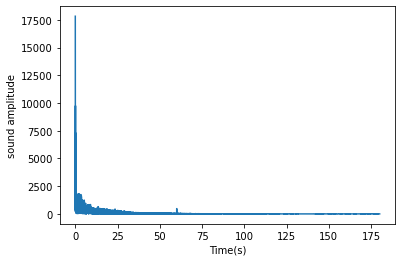

In [34]:
song_magnitude, song_phase, song_frequency=fourier_function(song)
plotFourierMag(song_magnitude)

In [35]:
equalizerRange_Triangle(song_magnitude,song_frequency,[[1,5]],-2)

1


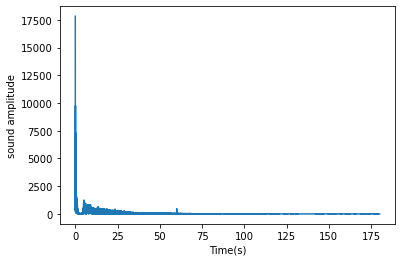

In [36]:
plotFourierMag(new_mag)
song_edited = calc_inv_fourier(new_mag, song_phase)

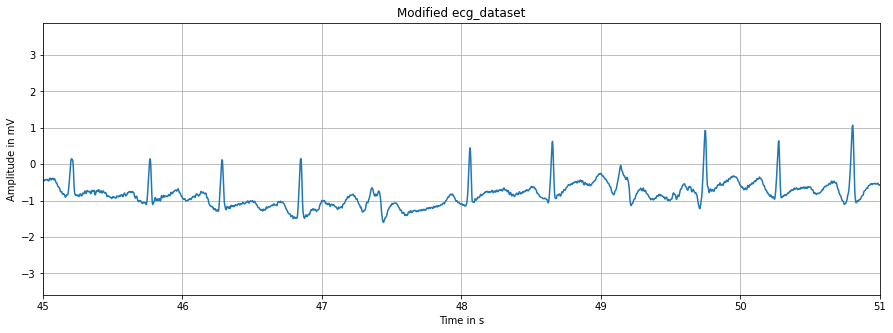

In [37]:
sr =360
fig = plt.figure(figsize=[15, 5])
plt.plot(time, song_edited)
plt.xlim(45, 51)
plt.title("Modified ecg_dataset")
plt.xlabel("Time in s")
plt.ylabel("Amplitude in mV")
plt.grid()